In [1]:

# import packages
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read cleaned dataset
df = pd.read_csv(r'Processed_datasets/cleaned_train_data.csv')

In [3]:
df.head()

,incidentid,alertid,detectorid,alerttitle,category,incidentgrade,entitytype,evidencerole,filename,folderpath,resourceidname,osfamily,osversion,countrycode,state,city,year,month,day,hour
0,612,123247,7,6,initialaccess,truepositive,ip,related,289573,117668,3586,5,66,31,6,3,2024,6,4,6
1,326,210035,58,43,exfiltration,falsepositive,user,impacted,289573,117668,3586,5,66,242,1445,10630,2024,6,14,3
2,58352,712507,423,298,initialaccess,falsepositive,url,related,289573,117668,3586,5,66,242,1445,10630,2024,6,13,4
3,32992,774301,2,2,commandandcontrol,benignpositive,url,related,289573,117668,3586,5,66,242,1445,10630,2024,6,10,16
4,4359,188041,9,74,execution,truepositive,user,impacted,289573,117668,3586,5,66,242,1445,10630,2024,6,15,1


Exploratory Data Analysis

In [4]:
df.describe()

,incidentid,alertid,detectorid,alerttitle,filename,folderpath,resourceidname,osfamily,osversion,countrycode,state,city,year,month,day,hour
count,22293.000000,2.229300e+04,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000
mean,69985.685103,4.018458e+05,102.437088,2874.114206,262750.454358,107807.664155,3583.000807,4.898085,64.653524,223.724667,1350.266586,9929.542771,2023.999955,5.909792,9.789216,12.184856
std,119388.551059,4.546488e+05,399.278423,11025.613849,80890.968639,31935.469709,97.635623,0.705660,9.320349,62.761817,353.361415,2617.674340,0.006698,0.295124,6.176927,6.748757
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023.000000,1.000000,1.000000,0.000000
25%,505.000000,2.377400e+04,2.000000,2.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.000000,6.000000,5.000000,7.000000
50%,10049.000000,2.142530e+05,9.000000,11.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.000000,6.000000,9.000000,13.000000
75%,83990.000000,6.626100e+05,44.000000,188.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.000000,6.000000,13.000000,18.000000
max,599449.000000,1.718609e+06,8983.000000,109424.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.000000,12.000000,31.000000,23.000000


In [5]:
df.describe(include="object")

,category,incidentgrade,entitytype,evidencerole
count,22293,22293,22293,22293
unique,17,3,20,2
top,initialaccess,benignpositive,ip,related
freq,10122,9795,5058,12221


Extract numerical column names

In [6]:
numerical_columns = df.select_dtypes(include="number").columns

In [7]:
numerical_columns

Index(['incidentid', 'alertid', 'detectorid', 'alerttitle', 'filename',
       'folderpath', 'resourceidname', 'osfamily', 'osversion', 'countrycode',
       'state', 'city', 'year', 'month', 'day', 'hour'],
      dtype='object')

Histogram (Numerical Data)

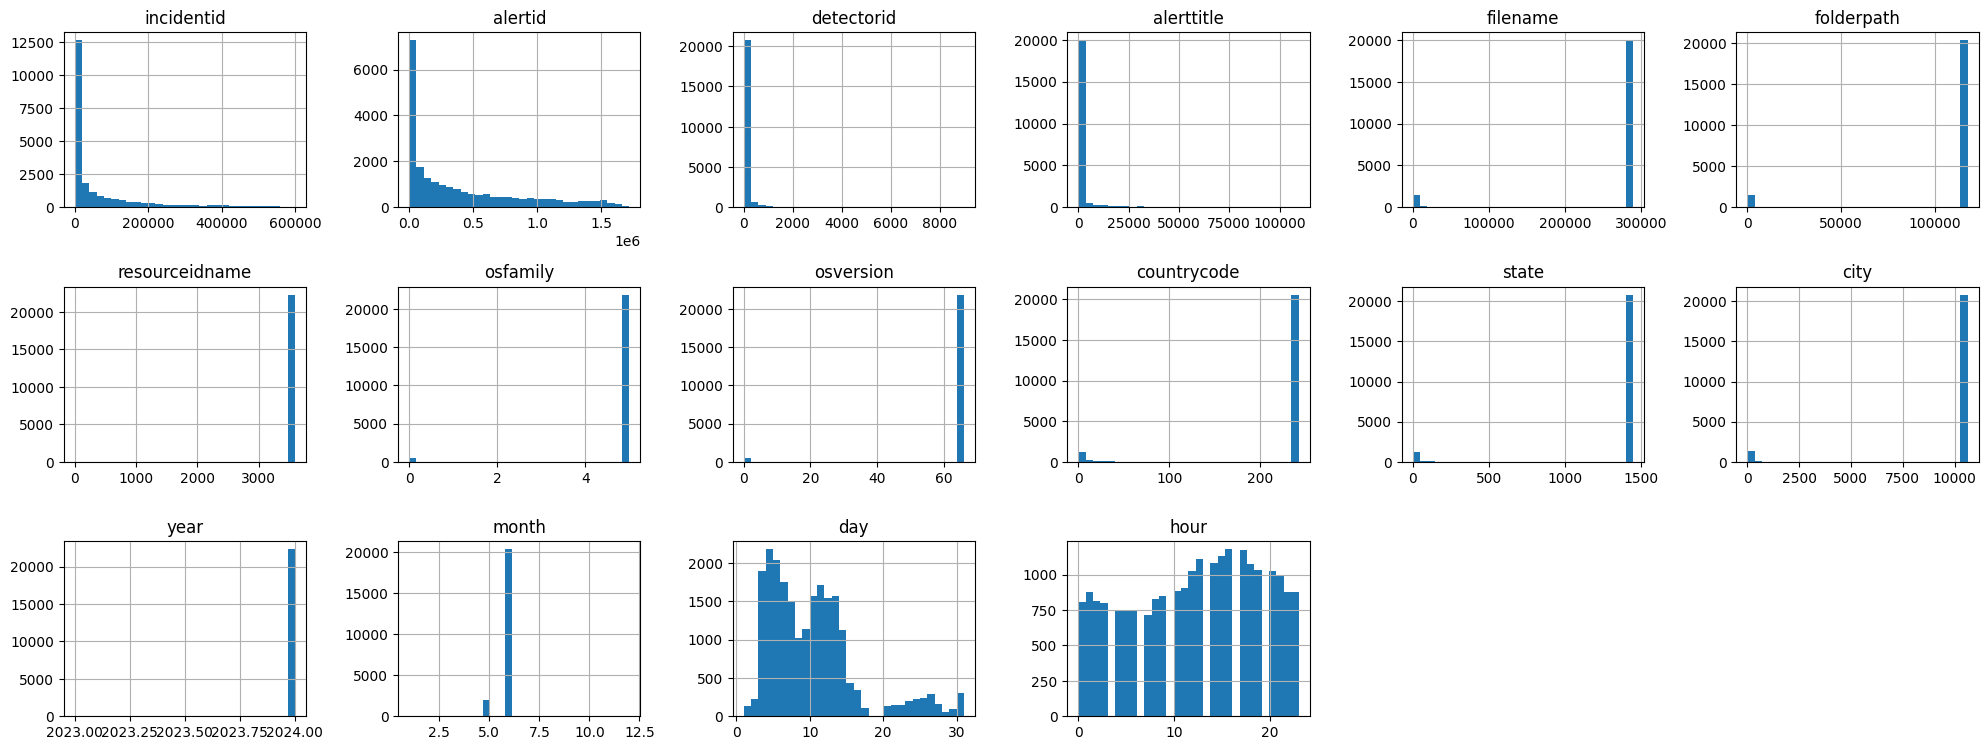

In [8]:
df.hist(figsize=(20, 15), bins=30, layout=(6,6))
plt.tight_layout()
plt.show()

Barplot (Categortical data)

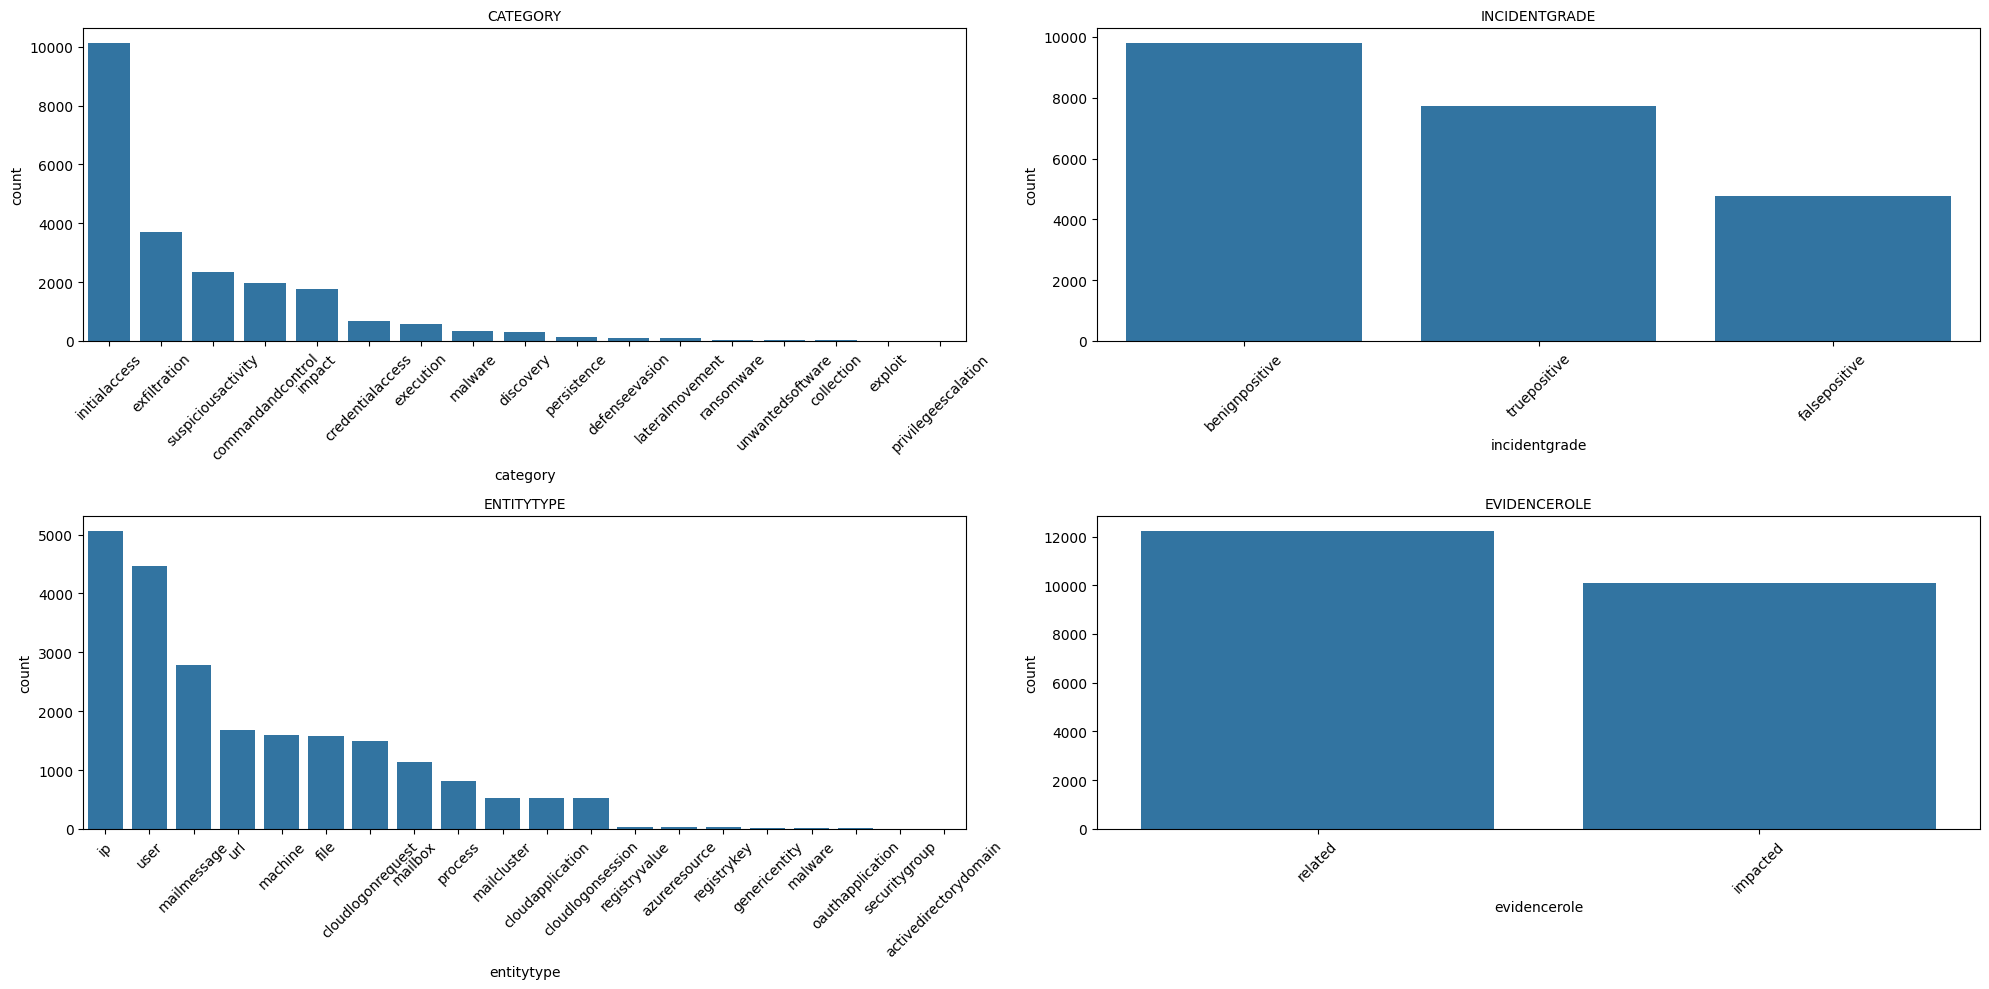

In [9]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Number of plots per row
plots_per_row = 2

# Calculate the number of rows needed
num_rows = (len(categorical_columns) + plots_per_row - 1) // plots_per_row

# Create the subplots with increased figure size
fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(20, num_rows * 5))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop through the categorical columns and create the bar plots
for idx, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axs[idx], order=df[col].value_counts().index)
    axs[idx].set_title(col.upper(), fontsize=10)
    axs[idx].tick_params(axis='x', rotation=45)

# Hide any empty subplots
for idx in range(len(categorical_columns), len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()

Box plot (detecting outliers)

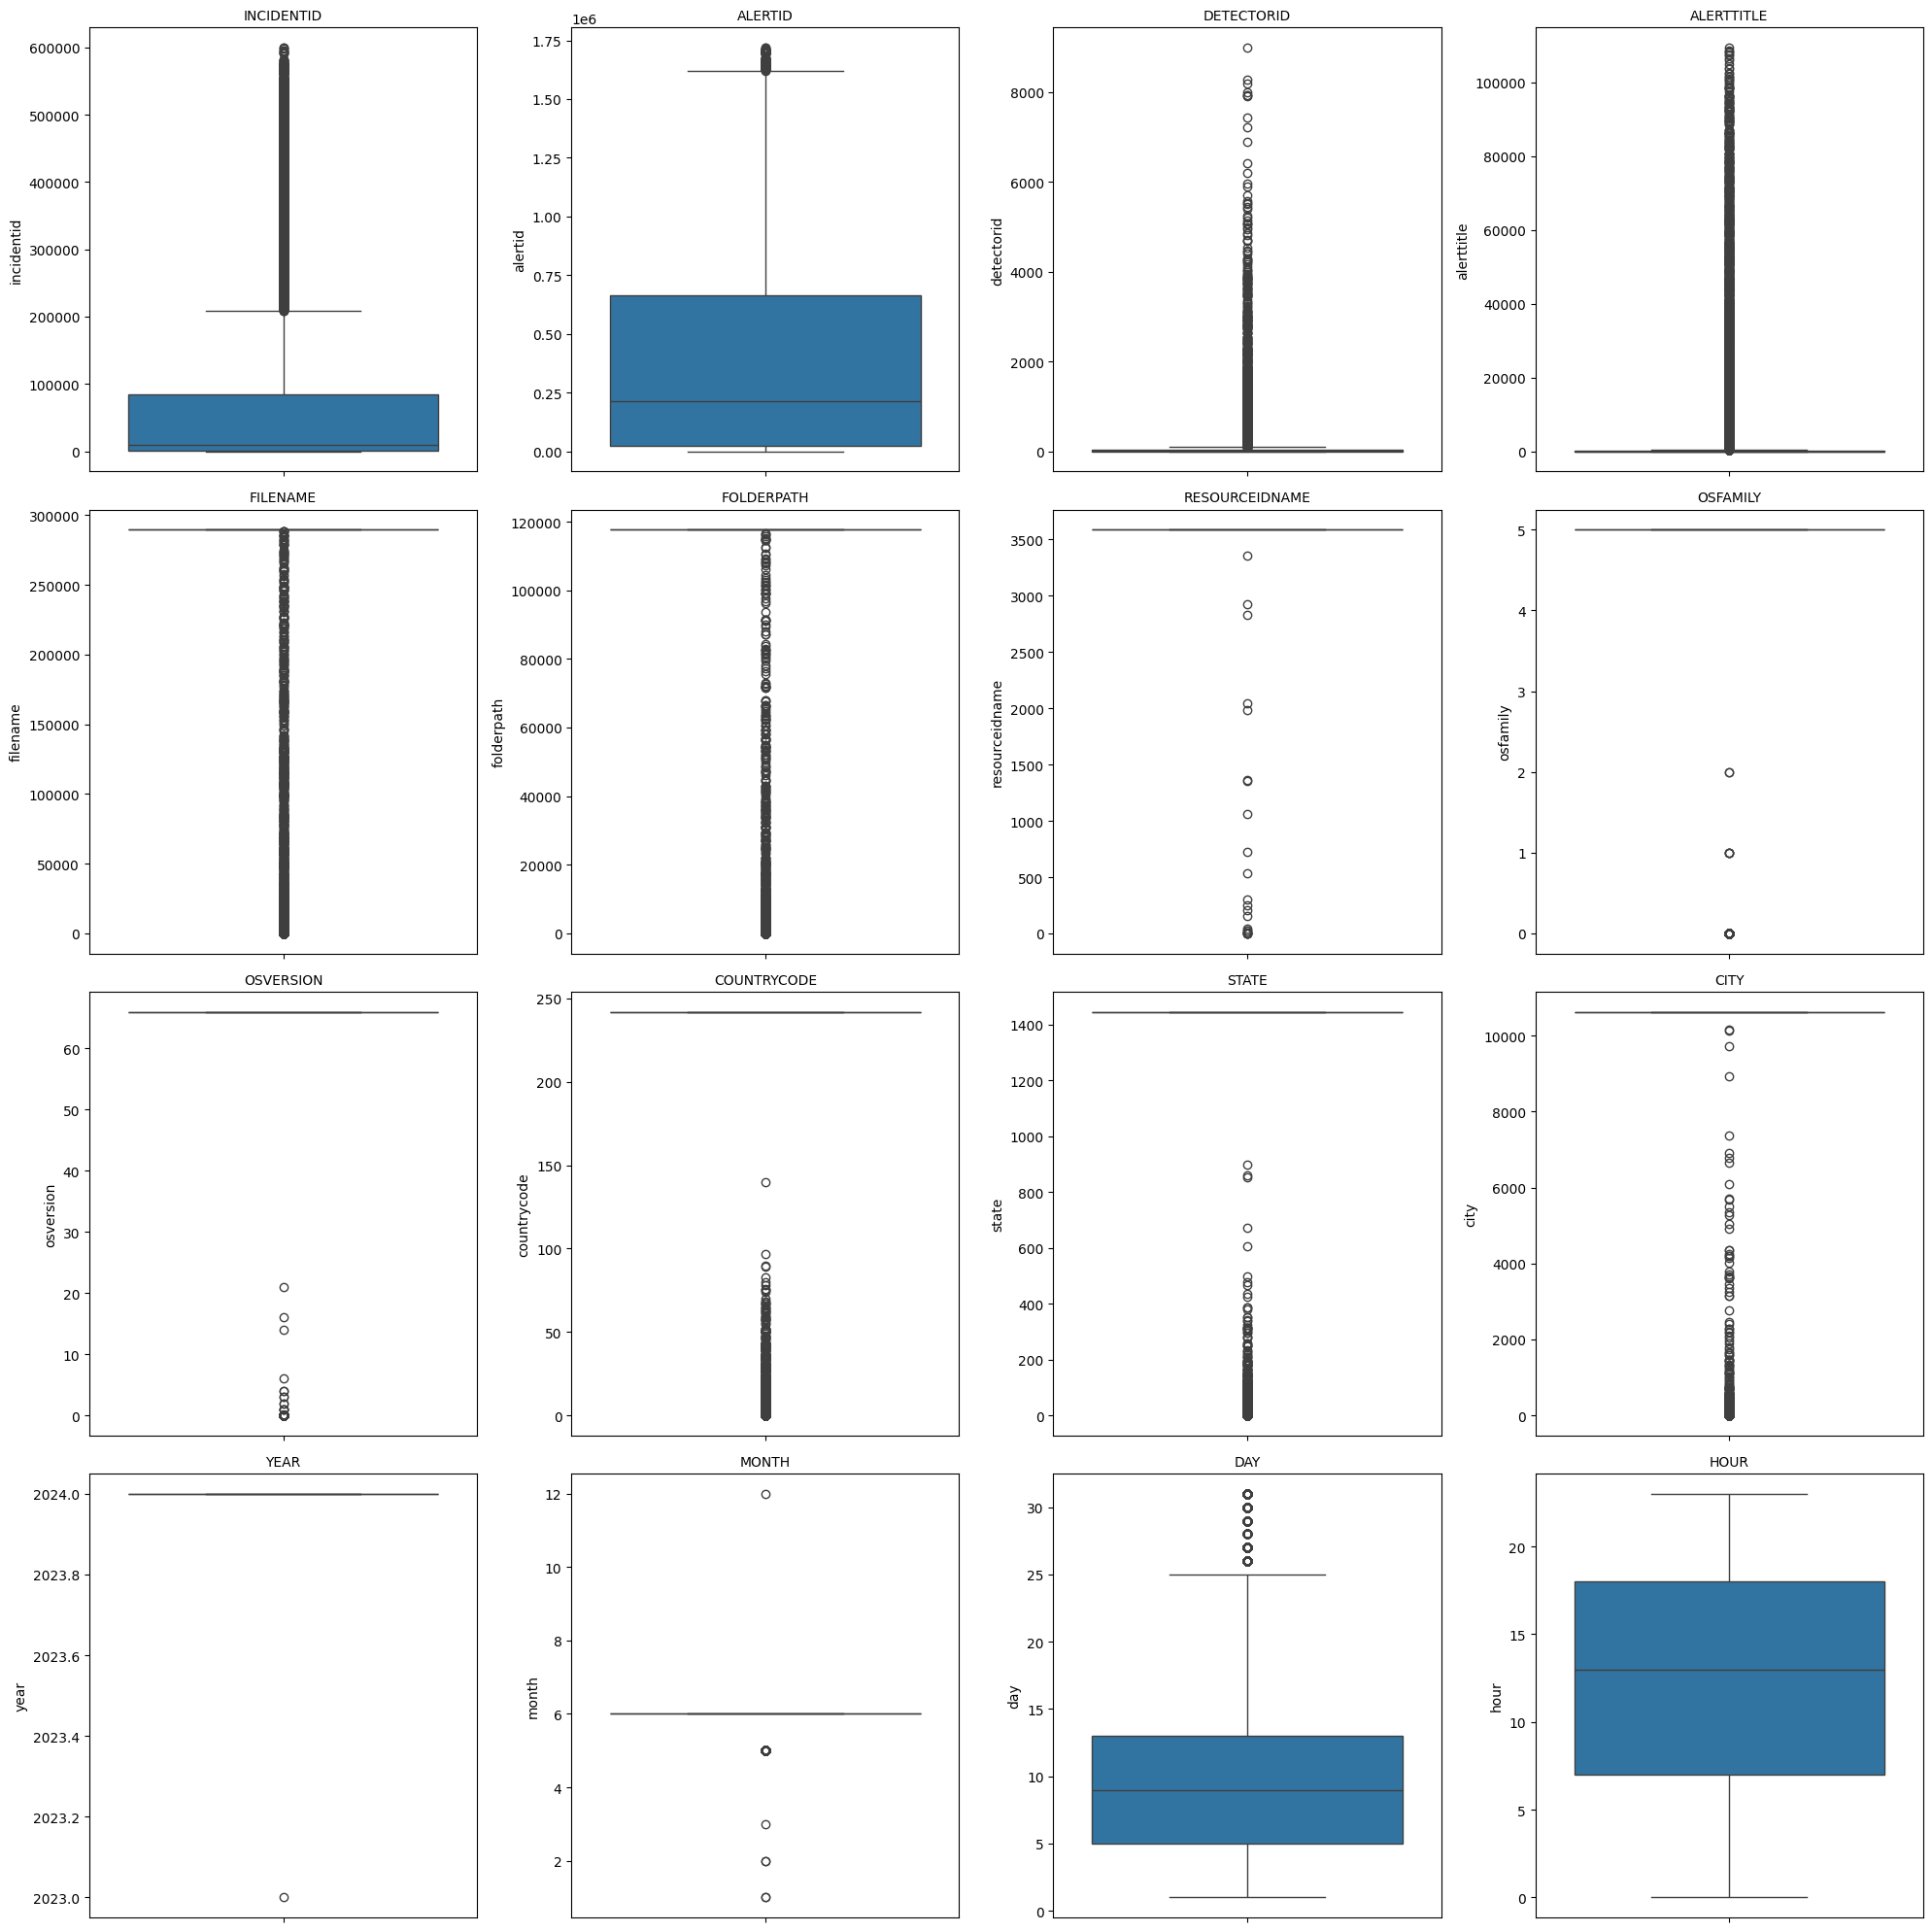

In [10]:
# Number of plots per row
plots_per_row = 4

# Calculate the number of rows needed
num_rows = (len(numerical_columns) + plots_per_row - 1) // plots_per_row

# Create the subplots with increased figure size
fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(20, num_rows * 5))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop through the numerical columns to create the box plots
for idx, num_col in enumerate(numerical_columns):
    sns.boxplot(data=df, y=num_col, ax=axs[idx])
    axs[idx].set_title(f'{num_col.upper()}', fontsize=10)
    axs[idx].tick_params(axis='x', rotation=45)

# Hide any empty subplots
for idx in range(len(numerical_columns), len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()

Correlation Analysis

In [11]:
numerical_columns

Index(['incidentid', 'alertid', 'detectorid', 'alerttitle', 'filename',
       'folderpath', 'resourceidname', 'osfamily', 'osversion', 'countrycode',
       'state', 'city', 'year', 'month', 'day', 'hour'],
      dtype='object')

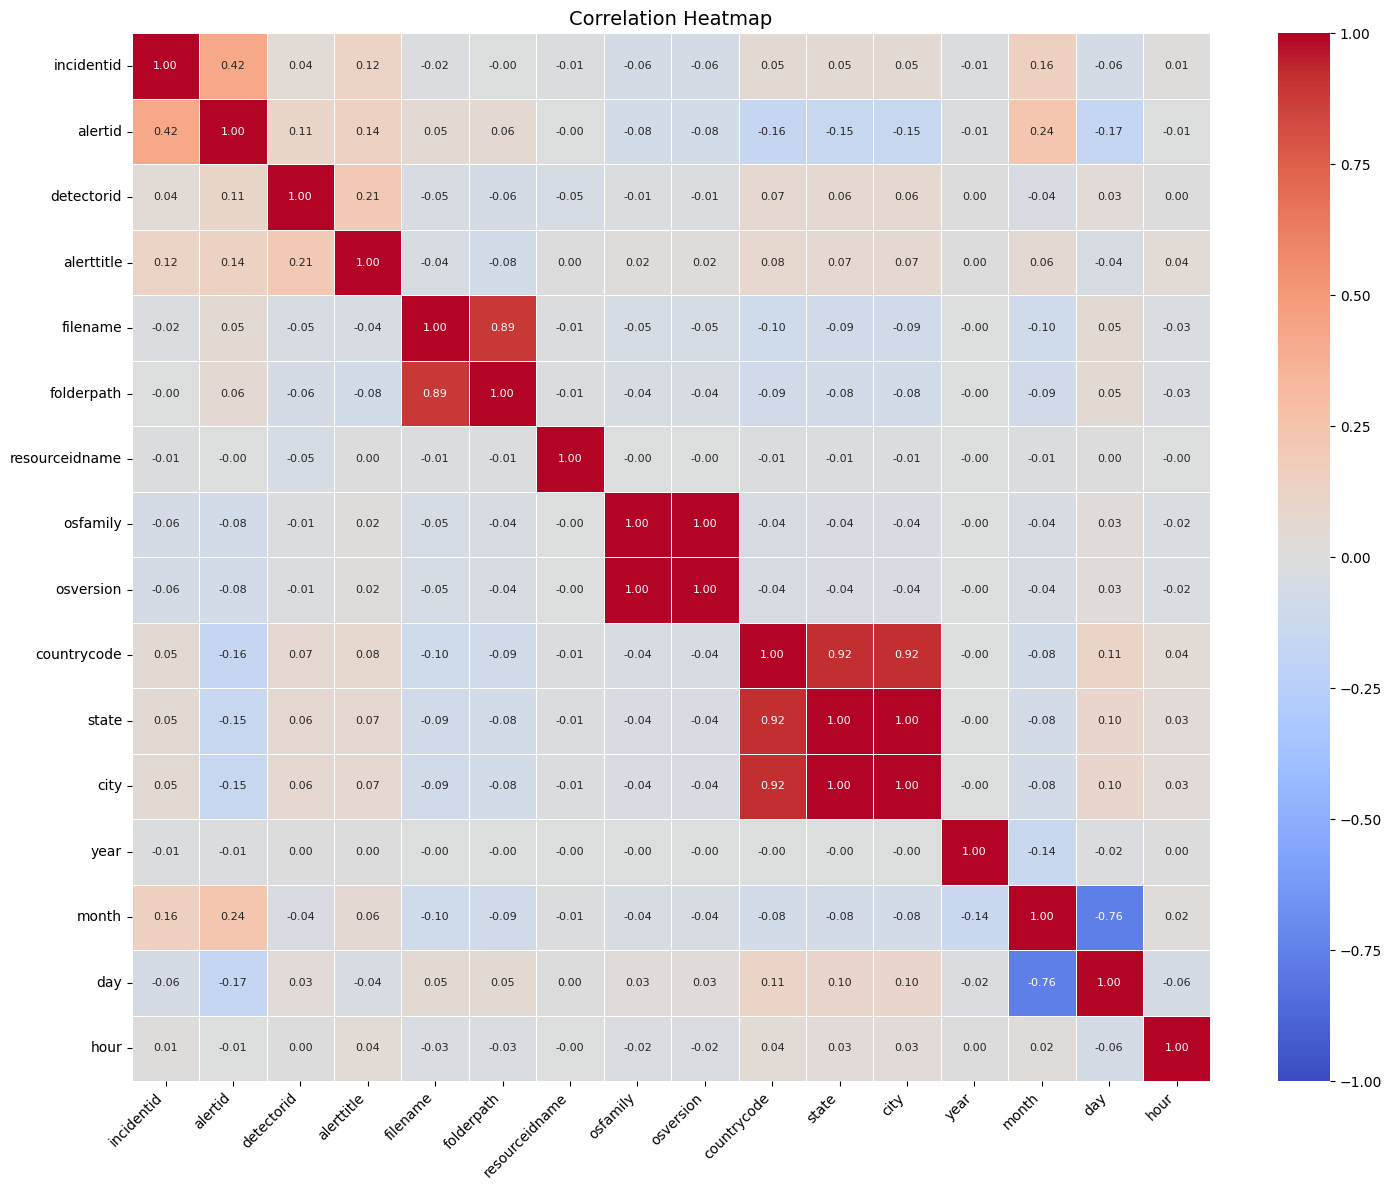

In [12]:
# Set a figure size
plt.figure(figsize=(15, 12))  # Adjust the size as per your need

# Create the heatmap with adjusted parameters
sns.heatmap(df[numerical_columns].corr(), 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1, 
            linewidths=0.5, 
            annot_kws={"size": 8})  # Adjust the annotation font size

# Rotate the x-axis and y-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add title with adjusted font size
plt.title('Correlation Heatmap', fontsize=14)

plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()